# Core 2 Artificial Neural Network

In this project, I will create a neural network that can classify Pokémon based on their atributes.

## EDA

I will start with cleaning and visualizing the data.

### 1. Data Understanding

I will start with Understanding the dataset

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np

#Reading the data
df_pokemon = pd.read_csv("pokemon.csv")

#Show the first 5 rows of the data
df_pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [2]:
#Check what data we have, their count and their data type
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [3]:
#Check the shape of the dataset
df_pokemon.shape

(801, 41)

In [4]:
#Check unique values
df_pokemon.nunique()

abilities            482
against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          34
classfication        588
defense              109
experience_growth      6
height_m              51
hp                    99
japanese_name        801
name                 801
percentage_male        7
pokedex_number       801
sp_attack            111
sp_defense            97
speed                113
type1                 18
type2                 18
weight_kg            421
generation             7


### 2. Data Cleaning

Now I want to check if there are any empty columns and replace them with values

In [5]:
df_pokemon.isnull().values.any()

True

In [6]:
#Put the columns with null values in seperate variable and print it
cols_missing_val = df_pokemon.columns[df_pokemon.isnull().any()].tolist()
print(cols_missing_val)

['height_m', 'percentage_male', 'type2', 'weight_kg']


In [7]:
#Count missing values in each column:
for col in cols_missing_val:
    print("%s : %d" % (col, df_pokemon[col].isnull().sum()))

height_m : 20
percentage_male : 98
type2 : 384
weight_kg : 20


<AxesSubplot:>

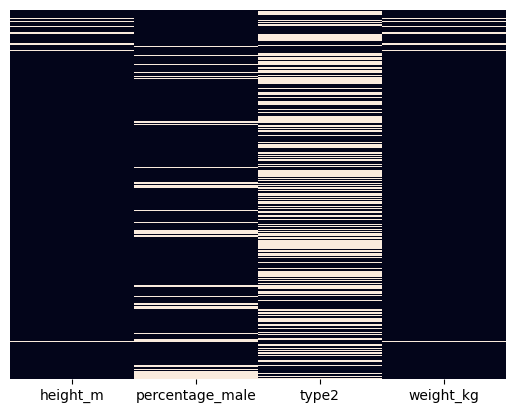

In [8]:
sns.heatmap(df_pokemon[cols_missing_val].isnull(), yticklabels = False, cbar = False)

In [10]:
#Genderless pokemons can be assigned '-1'
df_pokemon['percentage_male'].fillna(np.int(-1), inplace= True)

C:\Users\Warmtebron\AppData\Local\Temp\ipykernel_21124\2827358361.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_pokemon['percentage_male'].fillna(np.int(-1), inplace= True)


In [11]:
#Unique values
df_pokemon['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [12]:
#replace nan with new type2
df_pokemon['type2'].fillna('hormann', inplace=True)

In [14]:
#Replace the missing values with 0.
df_pokemon['height_m'].fillna(np.int(0), inplace=True)
df_pokemon['weight_kg'].fillna(np.int(0), inplace=True)

C:\Users\Warmtebron\AppData\Local\Temp\ipykernel_21124\2156206290.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_pokemon['height_m'].fillna(np.int(0), inplace=True)
C:\Users\Warmtebron\AppData\Local\Temp\ipykernel_21124\2156206290.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

In [17]:
df_pokemon.isnull().values.any()

False

Now that all the missing values are filled, I'm going to change all dtypes of the dataset to int.

In [20]:
df_pokemon.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [21]:
for label,content in df_pokemon.items():
    if pd.api.types.is_float_dtype(content):
        df_pokemon[label] = df_pokemon[label].astype('int')

In [22]:
df_pokemon.dtypes

abilities            object
against_bug           int32
against_dark          int32
against_dragon        int32
against_electric      int32
against_fairy         int32
against_fight         int32
against_fire          int32
against_flying        int32
against_ghost         int32
against_grass         int32
against_ground        int32
against_ice           int32
against_normal        int32
against_poison        int32
against_psychic       int32
against_rock          int32
against_steel         int32
against_water         int32
attack                int64
base_egg_steps        int64
base_happiness        int64
base_total            int64
capture_rate         object
classfication        object
defense               int64
experience_growth     int64
height_m              int32
hp                    int64
japanese_name        object
name                 object
percentage_male       int32
pokedex_number        int64
sp_attack             int64
sp_defense            int64
speed               

In [24]:
for label,content in df_pokemon.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_pokemon[label] = df_pokemon[label].astype('category')
df_pokemon.dtypes

abilities            category
against_bug             int32
against_dark            int32
against_dragon          int32
against_electric        int32
against_fairy           int32
against_fight           int32
against_fire            int32
against_flying          int32
against_ghost           int32
against_grass           int32
against_ground          int32
against_ice             int32
against_normal          int32
against_poison          int32
against_psychic         int32
against_rock            int32
against_steel           int32
against_water           int32
attack                  int64
base_egg_steps          int64
base_happiness          int64
base_total              int64
capture_rate         category
classfication        category
defense                 int64
experience_growth       int64
height_m                int32
hp                      int64
japanese_name        category
name                 category
percentage_male         int32
pokedex_number          int64
sp_attack 

In [25]:
for label,content in df_pokemon.items():
    if pd.api.types.is_categorical_dtype(content):
        df_pokemon[label] = pd.Categorical(content).codes + 1

In [26]:
df_pokemon.dtypes

abilities            int16
against_bug          int32
against_dark         int32
against_dragon       int32
against_electric     int32
against_fairy        int32
against_fight        int32
against_fire         int32
against_flying       int32
against_ghost        int32
against_grass        int32
against_ground       int32
against_ice          int32
against_normal       int32
against_poison       int32
against_psychic      int32
against_rock         int32
against_steel        int32
against_water        int32
attack               int64
base_egg_steps       int64
base_happiness       int64
base_total           int64
capture_rate          int8
classfication        int16
defense              int64
experience_growth    int64
height_m             int32
hp                   int64
japanese_name        int16
name                 int16
percentage_male      int32
pokedex_number       int64
sp_attack            int64
sp_defense           int64
speed                int64
type1                 int8
t